In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()


## 1. Análisis del dataset Ascombe

In [2]:
# Cargamos el dataset y visualizamos los 10 primeros registros
# ===========================================================
df_anscombe = pd.read_csv('anscombe.csv')
df_anscombe.head(10)

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
0,1,10,10,10,8,8.04,9.14,7.46,6.58
1,2,8,8,8,8,6.95,8.14,6.77,5.76
2,3,13,13,13,8,7.58,8.74,12.74,7.71
3,4,9,9,9,8,8.81,8.77,7.11,8.84
4,5,11,11,11,8,8.33,9.26,7.81,8.47
5,6,14,14,14,8,9.96,8.10,8.84,7.04
6,7,6,6,6,8,7.24,6.13,6.08,5.25
7,8,4,4,4,19,4.26,3.10,5.39,12.50
8,9,12,12,12,8,10.84,9.13,8.15,5.56
9,10,7,7,7,8,4.82,7.26,6.42,7.91


Text(0.5, 1.0, 'Gráfico de dispersión')

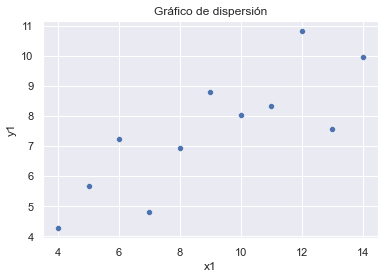

In [3]:
# realizamos un gráfico de dispersión del primer par de variables
# ===========================================================
sns.scatterplot(data = df_anscombe, x= 'x1',y ='y1' )
plt.title('Gráfico de dispersión')

Text(0.5, 1.0, 'Gráfico de dispersión')

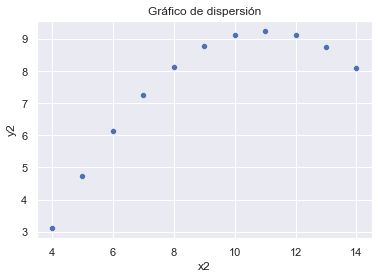

In [4]:
# realizamos un gráfico de dispersión del segundo par de variables
# ===========================================================
sns.scatterplot(data = df_anscombe, x= 'x2',y ='y2' )
plt.title('Gráfico de dispersión')

Text(0.5, 1.0, 'Gráfico de dispersión')

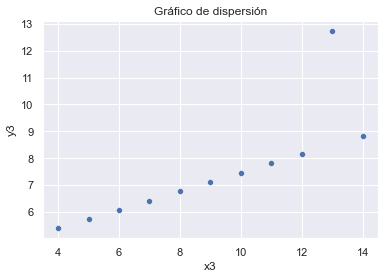

In [5]:
# realizamos un gráfico de dispersión del tercer par de variables
# ===========================================================
sns.scatterplot(data = df_anscombe, x= 'x3',y ='y3' )
plt.title('Gráfico de dispersión')

Text(0.5, 1.0, 'Gráfico de dispersión')

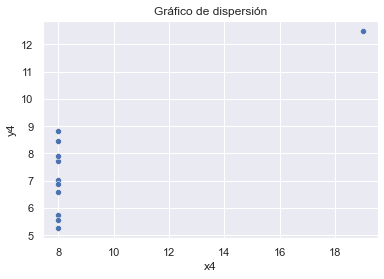

In [6]:
# realizamos un gráfico de dispersión del cuarto par de variables
# ===========================================================
sns.scatterplot(data = df_anscombe, x= 'x4',y ='y4' )
plt.title('Gráfico de dispersión')

## 2. Análisis exploratorio de los datos del dataset Precios 2019 2020
Nos disponemos a realizar un análisis exploratorio de los datos, en este caso, del dataset Precios_2019_2020.csv. Este conjunto de datos incluye los precios de multitud de verduras y frutas de Cananrias en general, como  de Gran Canaria, Tenerife y La Palma en particular.


In [7]:
# https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
# https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data    
# df = pd.read_csv('Precios_2019_20.csv', encoding="utf-8",  sep = ';', on_bad_lines='skip')
# https://stackoverflow.com/questions/61264795/pandas-unicodedecodeerror-utf-8-codec-cant-decode-bytes-in-position-0-1-in


# Cargamos el dataset
# ===========================================================
df = pd.read_csv('Precios_2019_20.csv', encoding="unicode-escape",  sep = ';', on_bad_lines='skip')
df.head(10)

,Zona,Cultivo,Año,Mes,Precio
0,CANARIAS,Aguacate,2016,Enero,1.89
1,CANARIAS,Aguacate,2016,Febrero,1.97
2,CANARIAS,Aguacate,2016,Marzo,1.93
3,CANARIAS,Aguacate,2016,Abril,2.09
4,CANARIAS,Aguacate,2016,Mayo,2.42
5,CANARIAS,Aguacate,2016,Junio,2.88
6,CANARIAS,Aguacate,2016,Julio,3.36
7,CANARIAS,Aguacate,2016,Agosto,3.72
8,CANARIAS,Aguacate,2016,Septiembre,3.18
9,CANARIAS,Aguacate,2016,Octubre,1.87


In [8]:
# Vemos cuantos registros tiene y la información sobre el tipo de variables
# ===========================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5828 entries, 0 to 5827
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Zona     5828 non-null   object
 1   Cultivo  5828 non-null   object
 2   Año      5828 non-null   int64 
 3   Mes      5828 non-null   object
 4   Precio   5828 non-null   object
dtypes: int64(1), object(4)
memory usage: 227.8+ KB


In [9]:
# Observamos los valores únicos de las variables categóricas
# ===========================================================
print(df['Zona'].unique())
print(df['Cultivo'].unique())
print(df['Año'].unique())
print(df['Mes'].unique())


['CANARIAS' 'Gran_Canaria' 'Tenerife' 'La_Palma']
['Aguacate' 'Bata/Boniato' 'Berenjena' 'Berro' 'Br¾coli/BrÚcol' 'Bubango'
 'CalabacÝn' 'Calabaza' 'Cebolla' 'Cebolleta' 'Col' 'Coliflor' 'Fresa'
 'JudÝa_Verde' 'Lechuga/achicoria' 'Lim¾n' 'Mango' 'Mel¾n' 'Naranja'
 'Papa' 'Papaya' 'Pepino' 'Pimiento' 'Pi±a(Ananßs)' 'Pi±a_de_millo/maÝz'
 'Plßtano' 'Puerro' 'SandÝa' 'Tomate' 'Zanahoria' 'Uva']
[2016 2017 2018 2019]
['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']


##### Conclusiones
Vemos que algunas variables no las ha cargado bien debido a la codificación, por ello nos disponemos a modifcarlas para dejarlas correctamente establecidas.


In [10]:
# Reemplazamos aquellos registros que no está correctamente escritos 
# por los correctos
# ===========================================================

df= df.replace(['CalabacÝn','JudÝa_Verde', 'Lim¾n', 'Mel¾n', 'Pi±a(Ananßs)', 'Pi±a_de_millo/maÝz','Plßtano', 'SandÝa','Br¾coli/BrÚcol'],
           ['Calabacín', 'Judia_Verde', 'Limón','Melón', 'Piña', 'Piña_de_millo/maíz', 'Plátano', 'Sandía','Brócoli'])

In [11]:
# Comprobamos que ahora si están correctamente escritos
# ===========================================================
print(df['Zona'].unique())
print(df['Cultivo'].unique())
print(df['Año'].unique())
print(df['Mes'].unique())

['CANARIAS' 'Gran_Canaria' 'Tenerife' 'La_Palma']
['Aguacate' 'Bata/Boniato' 'Berenjena' 'Berro' 'Brócoli' 'Bubango'
 'Calabacín' 'Calabaza' 'Cebolla' 'Cebolleta' 'Col' 'Coliflor' 'Fresa'
 'Judia_Verde' 'Lechuga/achicoria' 'Limón' 'Mango' 'Melón' 'Naranja'
 'Papa' 'Papaya' 'Pepino' 'Pimiento' 'Piña' 'Piña_de_millo/maíz' 'Plátano'
 'Puerro' 'Sandía' 'Tomate' 'Zanahoria' 'Uva']
[2016 2017 2018 2019]
['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']


In [12]:
# Comprobamos cuantos tipos diferentes de Cultivos hay.
# ===========================================================
print(len(df['Cultivo'].unique()))

31


### 2.1 Análisis de los nulos
###### En las siguientes celdas nos disponemos a analizar los 0's que existen en la variable Precios dentro de nuestro conjunto de datos. Una vez realizadas todas las visualizaciones, expondremos las conclusiones

In [13]:
# Comprobamos los valores nulos
# ===========================================================
df.isnull().sum()/df.shape[0]

Zona       0.0
Cultivo    0.0
Año        0.0
Mes        0.0
Precio     0.0
dtype: float64

##### Conclusiones
Después de realizar el análisis de valores nulos, a priori no parece que hayan, sin embargo, en este dataset los valores nulos están representados por puntos supensivos, por lo que optamos por reemplazarlos por 0.

In [14]:
# Reemplazamos todos los valores nulos por el valor 0
# ===========================================================
df= df.replace(['...', '....','..','.'],
           [0,0,0,0])

In [15]:
# Convertimos la variable Precio en numérica para poderla tratar
# ===========================================================
df['Precio'] = pd.to_numeric(df['Precio'])

Text(0.5, 1.0, 'Gráfico de densidad de Precios')

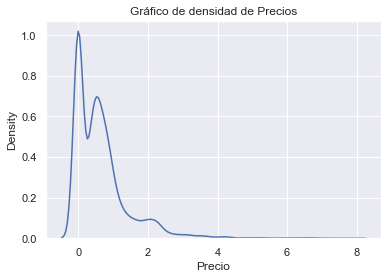

In [16]:
# Realizamos un gráfico de densidad de la variable Precio, para ver cómo se reparten
# los valores en esta variable
# ===========================================================
sns.kdeplot(df['Precio'])
plt.title('Gráfico de densidad de Precios')

In [17]:
# Definimos una función que nos permita realizar histogramas por año
# para visualizar el número de 0's
# ===========================================================

def histogramas_por_año(df, año):
    df = df[(df['Precio']==0) & (df['Año'] == año)]

    fig,(ax0,ax1,ax2) = plt.subplots(nrows=3, figsize =(20,20))

    # plt.figure(figsize=(15,5))
    ax0.set_title('Cultivos con más 0s en Precio en ' + str(año) +' en Gran Canaria',fontsize = 15)
    sns.histplot(data = df[df['Zona'] == 'Gran_Canaria'], x='Cultivo', ax=ax0)
    ax0.set_ylabel('Recuento',fontsize = 15)
    # ax0.set_xticks('Cultivo',rotation=90,fontsize = 30);

    ax1.set_title('Cultivos con más 0s en Precio en ' + str(año)  +' en Tenerife',fontsize = 15)
    sns.histplot(data = df[df['Zona'] == 'Tenerife'], x='Cultivo', ax=ax1)
    ax1.set_ylabel('Recuento',fontsize = 15)
    # # ax1.set_xticks('Cultivo',rotation=90,fontsize = 30);

    ax2.set_title('Cultivos con más 0s en Precio en ' + str(año)  +' en La Palma',fontsize = 15)
    sns.histplot(data = df[df['Zona'] == 'La_Palma'], x='Cultivo', ax=ax2)
    ax2.set_ylabel('Recuento',fontsize = 15)
    plt.xticks(rotation=90,fontsize = 15);

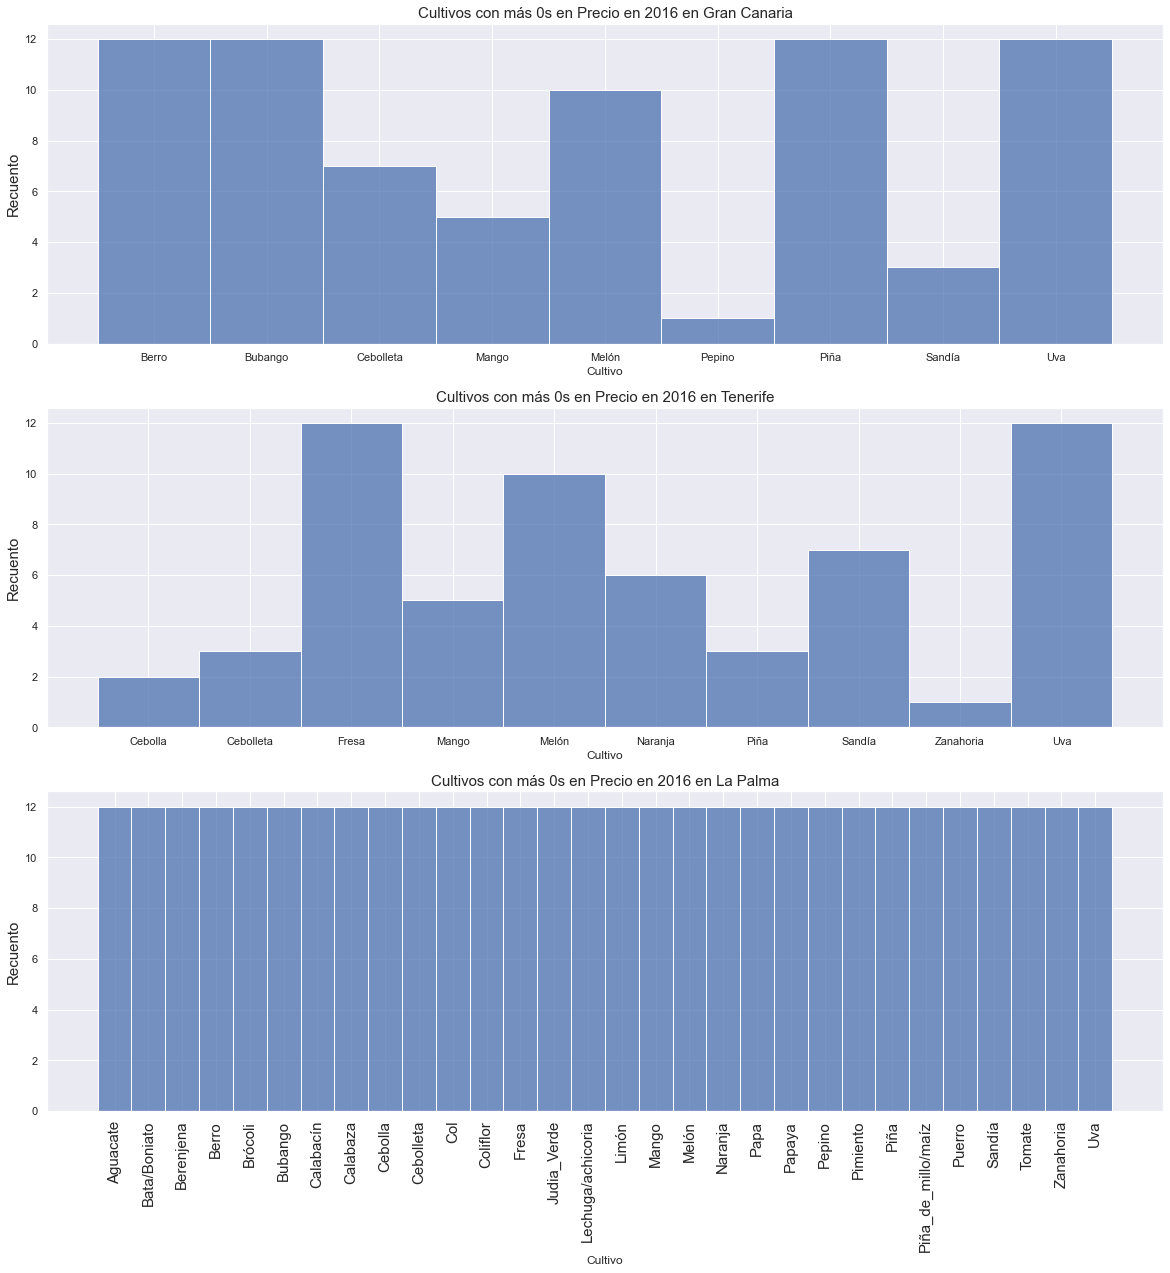

In [18]:
# Visualizamos el recuento de los cultivos con más 0's por isla en 2016
# ===========================================================
histogramas_por_año(df, 2016)

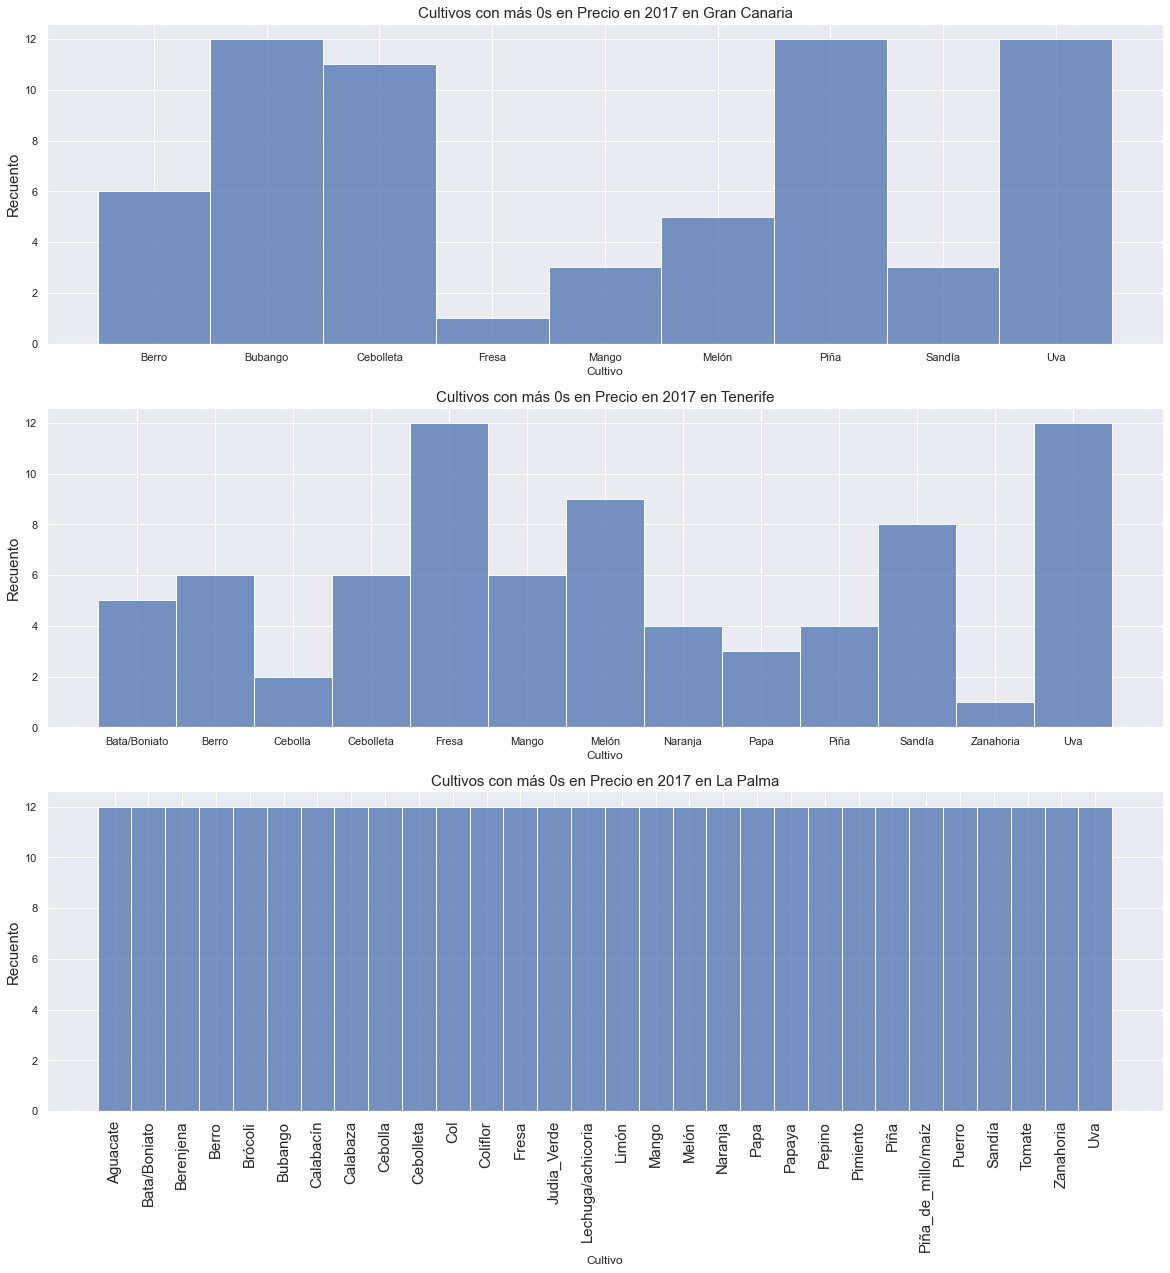

In [19]:
# Visualizamos el recuento de los cultivos con más 0's por isla en 2017
# ===========================================================
histogramas_por_año(df, 2017)

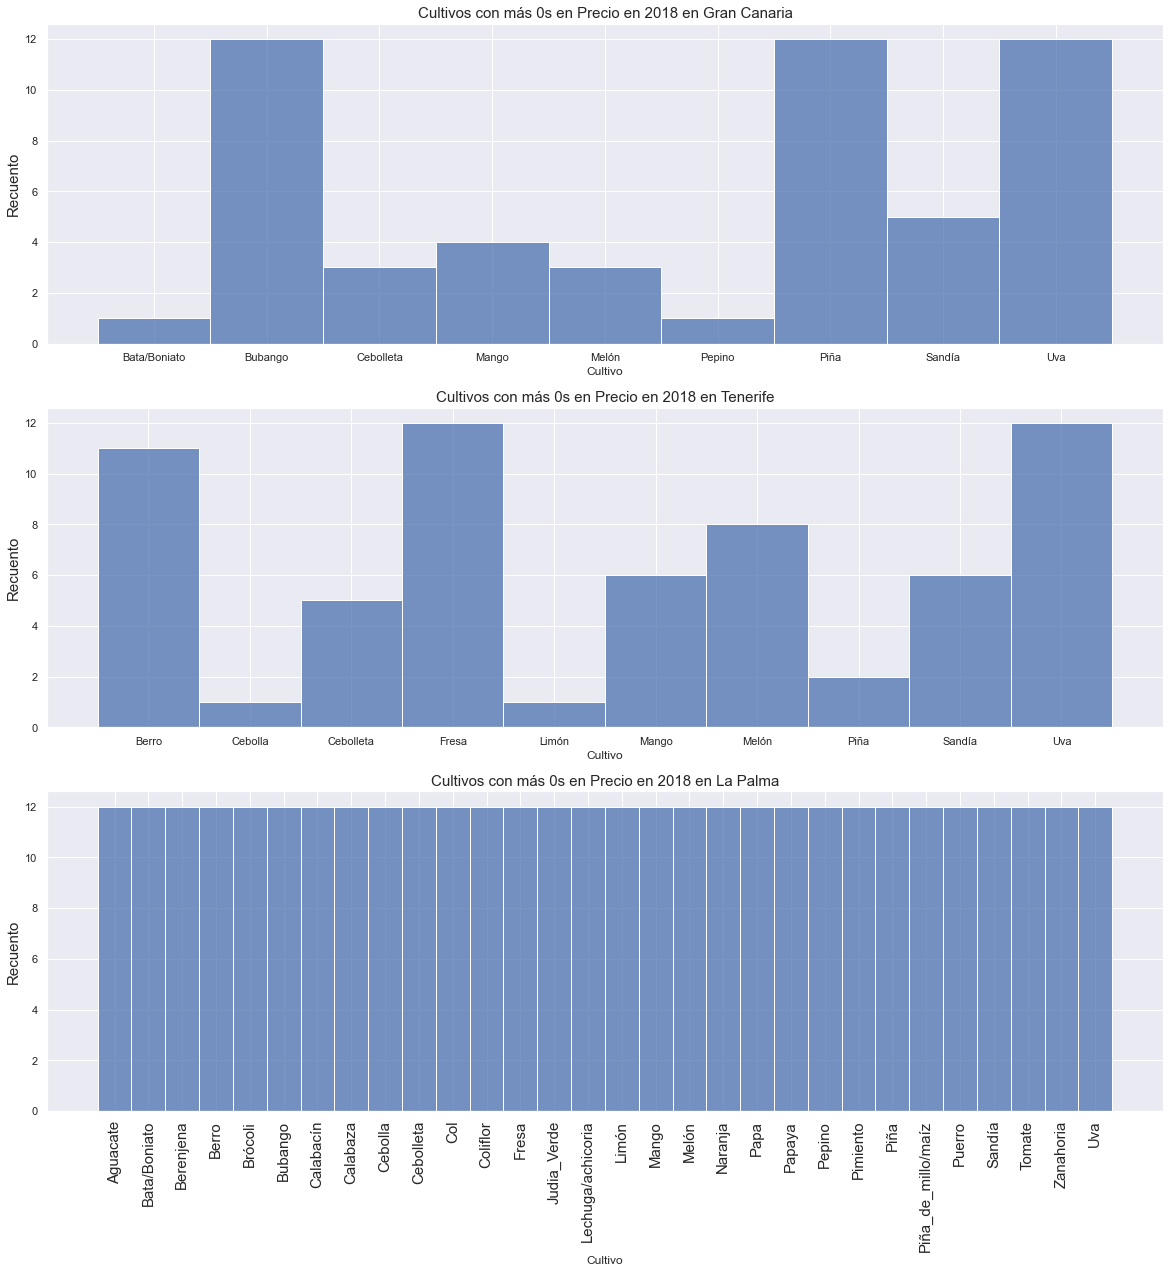

In [20]:
# Visualizamos el recuento de los cultivos con más 0's por isla en 2018
# ===========================================================
histogramas_por_año(df, 2018)

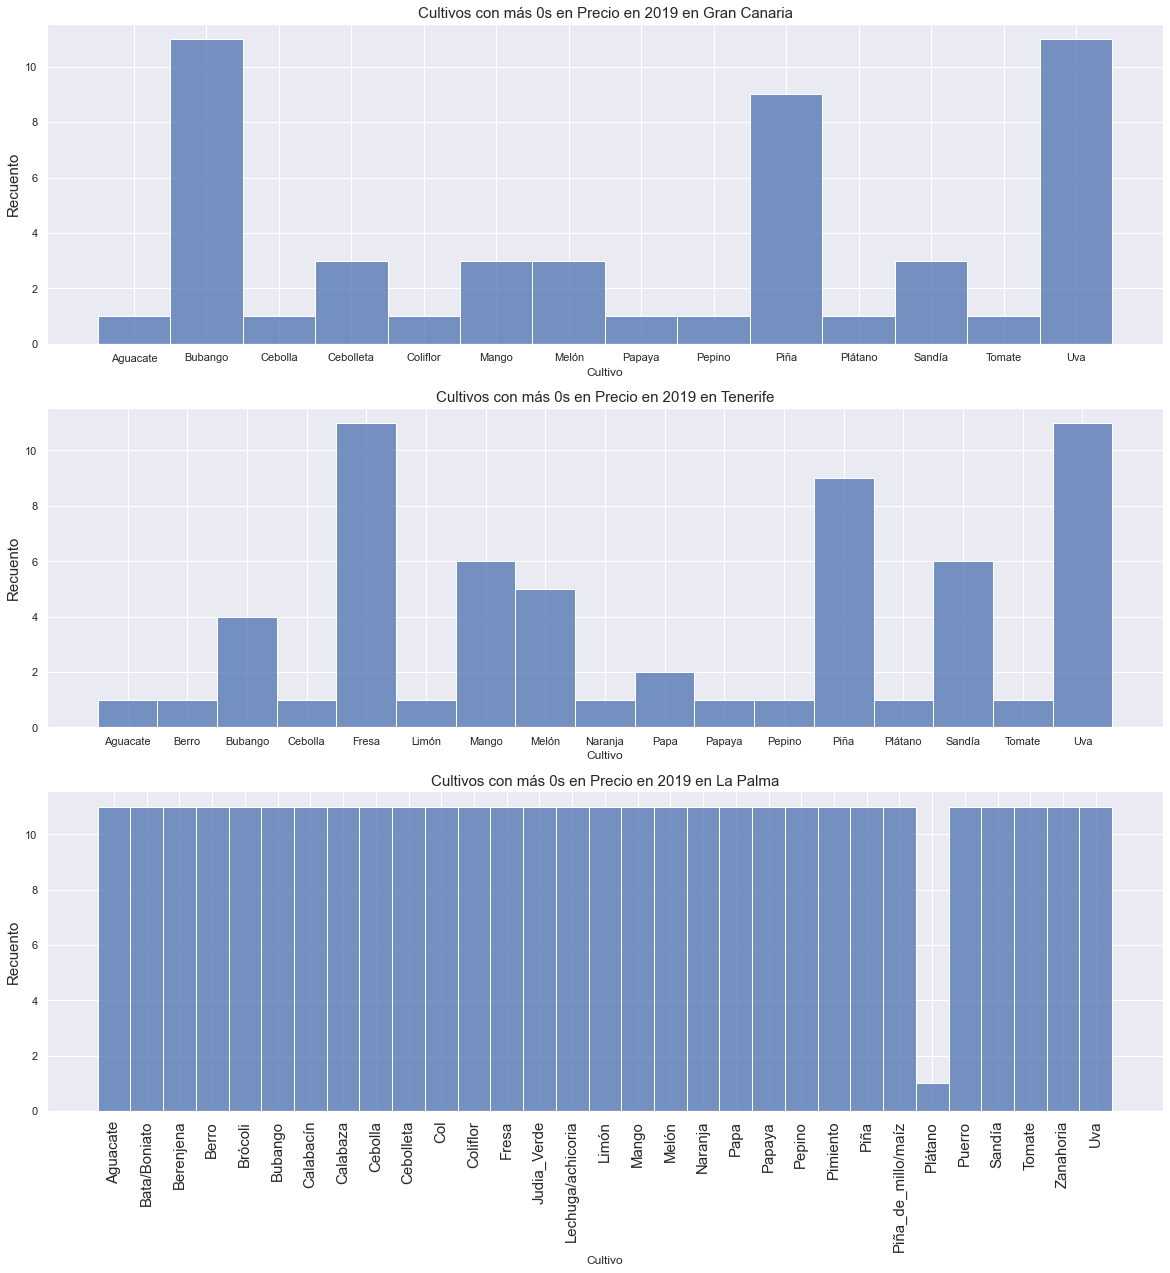

In [21]:
# Visualizamos el recuento de los cultivos con más 0's por isla en 2019
# ===========================================================
histogramas_por_año(df, 2019)

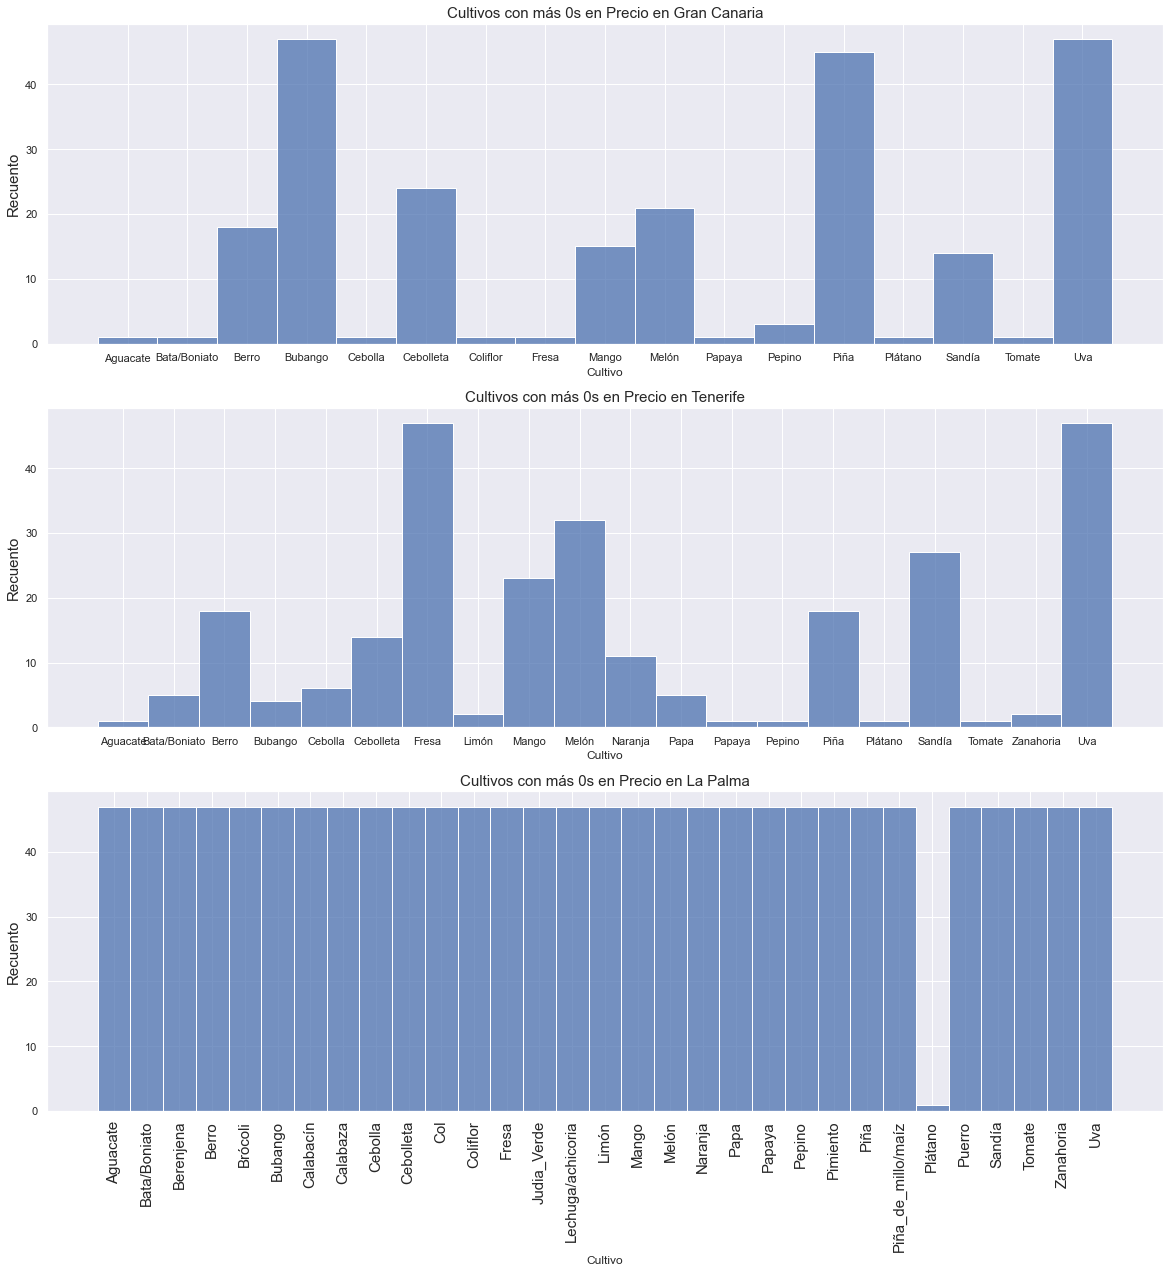

In [22]:
# Visualizamos el total de los 0's en la variable Precio
# ===========================================================

fig,(ax0,ax1,ax2) = plt.subplots(nrows=3, figsize =(20,20))

ax0.set_title('Cultivos con más 0s en Precio en Gran Canaria',fontsize = 15)
sns.histplot(data = df[(df['Precio']==0) & (df['Zona'] == 'Gran_Canaria')], x='Cultivo', ax=ax0)
ax0.set_ylabel('Recuento',fontsize = 15)

ax1.set_title('Cultivos con más 0s en Precio en Tenerife',fontsize = 15)
sns.histplot(data = df[(df['Precio']==0) & (df['Zona'] == 'Tenerife')], x='Cultivo', ax=ax1)
ax1.set_xticks(df[(df['Precio']==0) & (df['Zona'] == 'Tenerife')].Cultivo.unique(),rotation=45,fontsize = 30);
ax1.set_ylabel('Recuento',fontsize = 15)


ax2.set_title('Cultivos con más 0s en Precio en La Palma',fontsize = 15)
sns.histplot(data = df[(df['Precio']==0) & (df['Zona'] == 'La_Palma')], x='Cultivo', ax=ax2)
ax2.set_ylabel('Recuento',fontsize = 15)
plt.xticks(rotation=90,fontsize = 15);

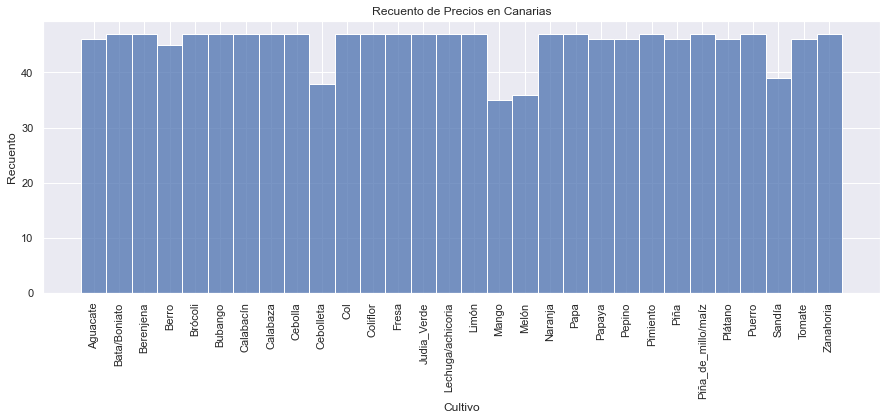

In [23]:
# Visualizamos los Precios que no son 0 en Canarias en general
# ===========================================================
plt.figure(figsize=(15,5))
sns.histplot(data = df[(df['Zona'] == 'CANARIAS') & (df['Precio'] != 0) ], x='Cultivo').set(title = 'Recuento de Precios en Canarias',
                                                                                            ylabel='Recuento')
plt.xticks(rotation=90);

# EL máximo es 48 (12 meses * 4 años). Indica qué datos tenemos en Zona == Canarias.

##### Conclusiones
Algunas de conclusiones que podemos lanzar al visualizar todas las gráficas son:
* No tenemos prácticamente datos de La Palma en en 30 de los 31 cultivos, salvo los plátanos, por lo tanto eliminamos todos los registros de La Palma que no sean plátanos
* No hay registros del precio de la uva en los datos
* No hay registros de Fresa en Tenerife, por lo que podemos intuir que no se cultiva.
* En varios cultivos como en Melón o Sandía faltan datos del Precio en torno a 2-4 meses en cada año, por lo que podemos intuir que se trata de un cultivo estacional y no se produce durante todo el año.
* Cultivos como el bubango o la piña parece que no se cultivan en Gran Canaria, ya que no tenemos ningún registro o casi ninguno.
    

### 2.2 Comparativa de precios de los limones y naranjas entre Tenerife y Gran Canaria

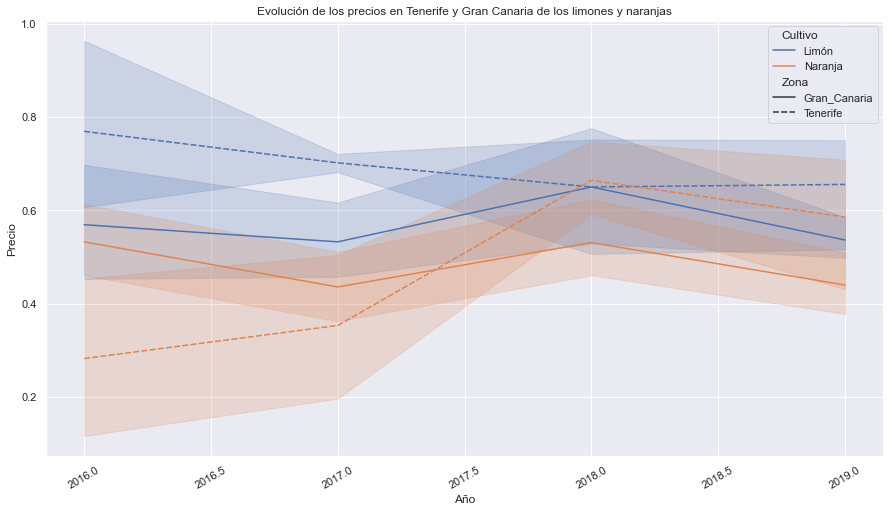

In [24]:
# Comparamos los precios en los últimos años de limones y naranjas 
# entre Gran Canaria y Tenerife
# ===========================================================
a = df[(df['Cultivo'] == 'Naranja' ) | (df['Cultivo'] == 'Limón')]
a = a[(a['Zona'] == 'Gran_Canaria' ) | (a['Zona'] == 'Tenerife' ) ]

plt.figure(figsize=(15,8))
sns.lineplot(data=a, x = 'Año', y='Precio', hue= 'Cultivo', style='Zona')
plt.title('Evolución de los precios en Tenerife y Gran Canaria de los limones y naranjas')
plt.xticks(rotation=30);

##### Conclusiones
Podemos observar que los limones en general tienen un precio más elevado que las naranjas. La tendencia de las naranajas en Tenerife ha sido alcista en los últimos años, superando a Gran Canaria. Podemos asegurar también que ambas son más caras en Tenerife que en Gran Canaria. 

### 2.3. Comparativa de precios de Aguacate en Tenerife y Gran Canaria

C:\Users\jdani\AppData\Local\Temp/ipykernel_19128/2235965140.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b =  a[ (df['Zona'] == 'Gran_Canaria' )  | (a['Zona'] == 'Tenerife' ) ]


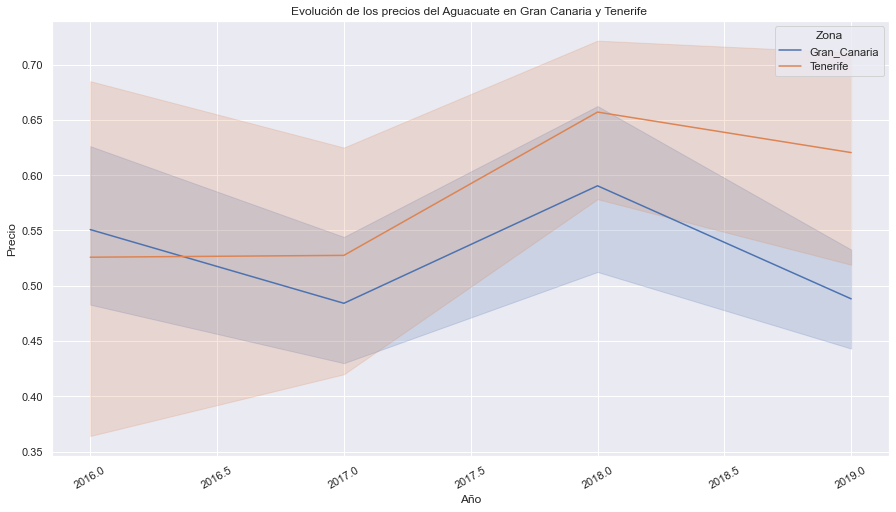

In [25]:
b = df[(df['Cultivo'] == 'Aguacate')  ]
b =  a[ (df['Zona'] == 'Gran_Canaria' )  | (a['Zona'] == 'Tenerife' ) ]

plt.figure(figsize=(15,8))
sns.lineplot(data=b, x = 'Año', y='Precio', hue= 'Zona')
plt.title('Evolución de los precios del Aguacuate en Gran Canaria y Tenerife ')
plt.xticks(rotation=30);

##### Conclusiones
Escribir las conclusiones aquí

### 2.4. Comparativa de frutas en Canarias
Comparamos varios tipos de fruta en 

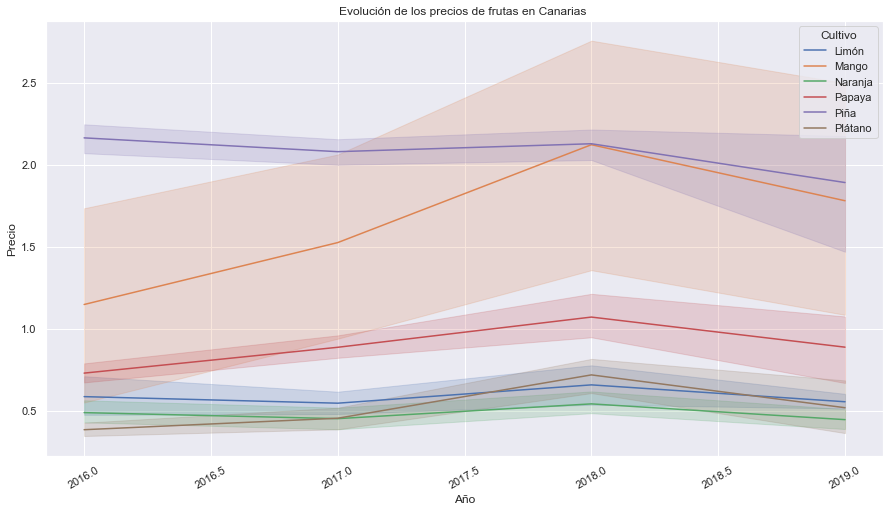

In [26]:

c = df[(df['Cultivo'] == 'Papaya') | (df['Cultivo'] == 'Plátano') | (df['Cultivo'] == 'Naranja') | (df['Cultivo'] == 'Piña') | (df['Cultivo'] == 'Mango') | (df['Cultivo'] == 'Limón')]
c = c[ (c['Zona'] == 'CANARIAS' )]

plt.figure(figsize=(15,8))
sns.lineplot(data=c, x = 'Año', y='Precio', hue= 'Cultivo')
plt.title('Evolución de los precios de frutas en Canarias ')
plt.xticks(rotation=30);

#### Conclusiones
La Naranja es la fruta más barata con respecto a las otras seleccionadas. Esto contrasta con el precio medio de las naranjas o el zumo de naranja en la mayoría de establecimientos de Canarias.

### 2.5. Evolución del precio del plátano en Canarias
Comparamos el precio del plátano en las diferentes islas y en Canarias en General.

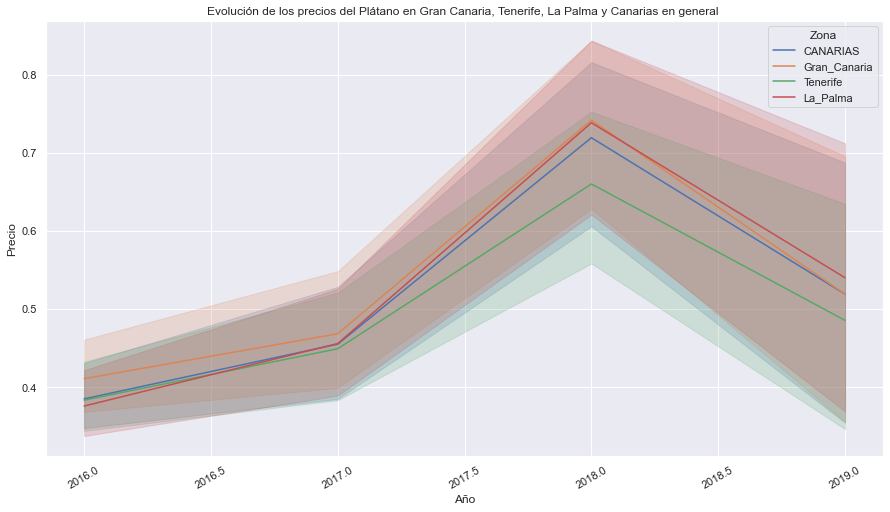

In [27]:
## Evolución del precio del plátano en Canarias
d = df[(df['Cultivo'] == 'Plátano') ]
d = d[ (d['Zona'] == 'Gran_Canaria' )  | (d['Zona'] == 'Tenerife' ) | (d['Zona'] == 'La_Palma' ) | (d['Zona'] == 'CANARIAS' ) ]

plt.figure(figsize=(15,8))
sns.lineplot(data=d, x = 'Año', y='Precio', hue= 'Zona')
plt.title('Evolución de los precios del Plátano en Gran Canaria, Tenerife, La Palma y Canarias en general ')
plt.xticks(rotation=30);

##### Conclusiones
Podemos extraer que el precio del plátano más barato está en Tenerife, que se mantiene por debajo de la media de la comunidad en los últimos años.